# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


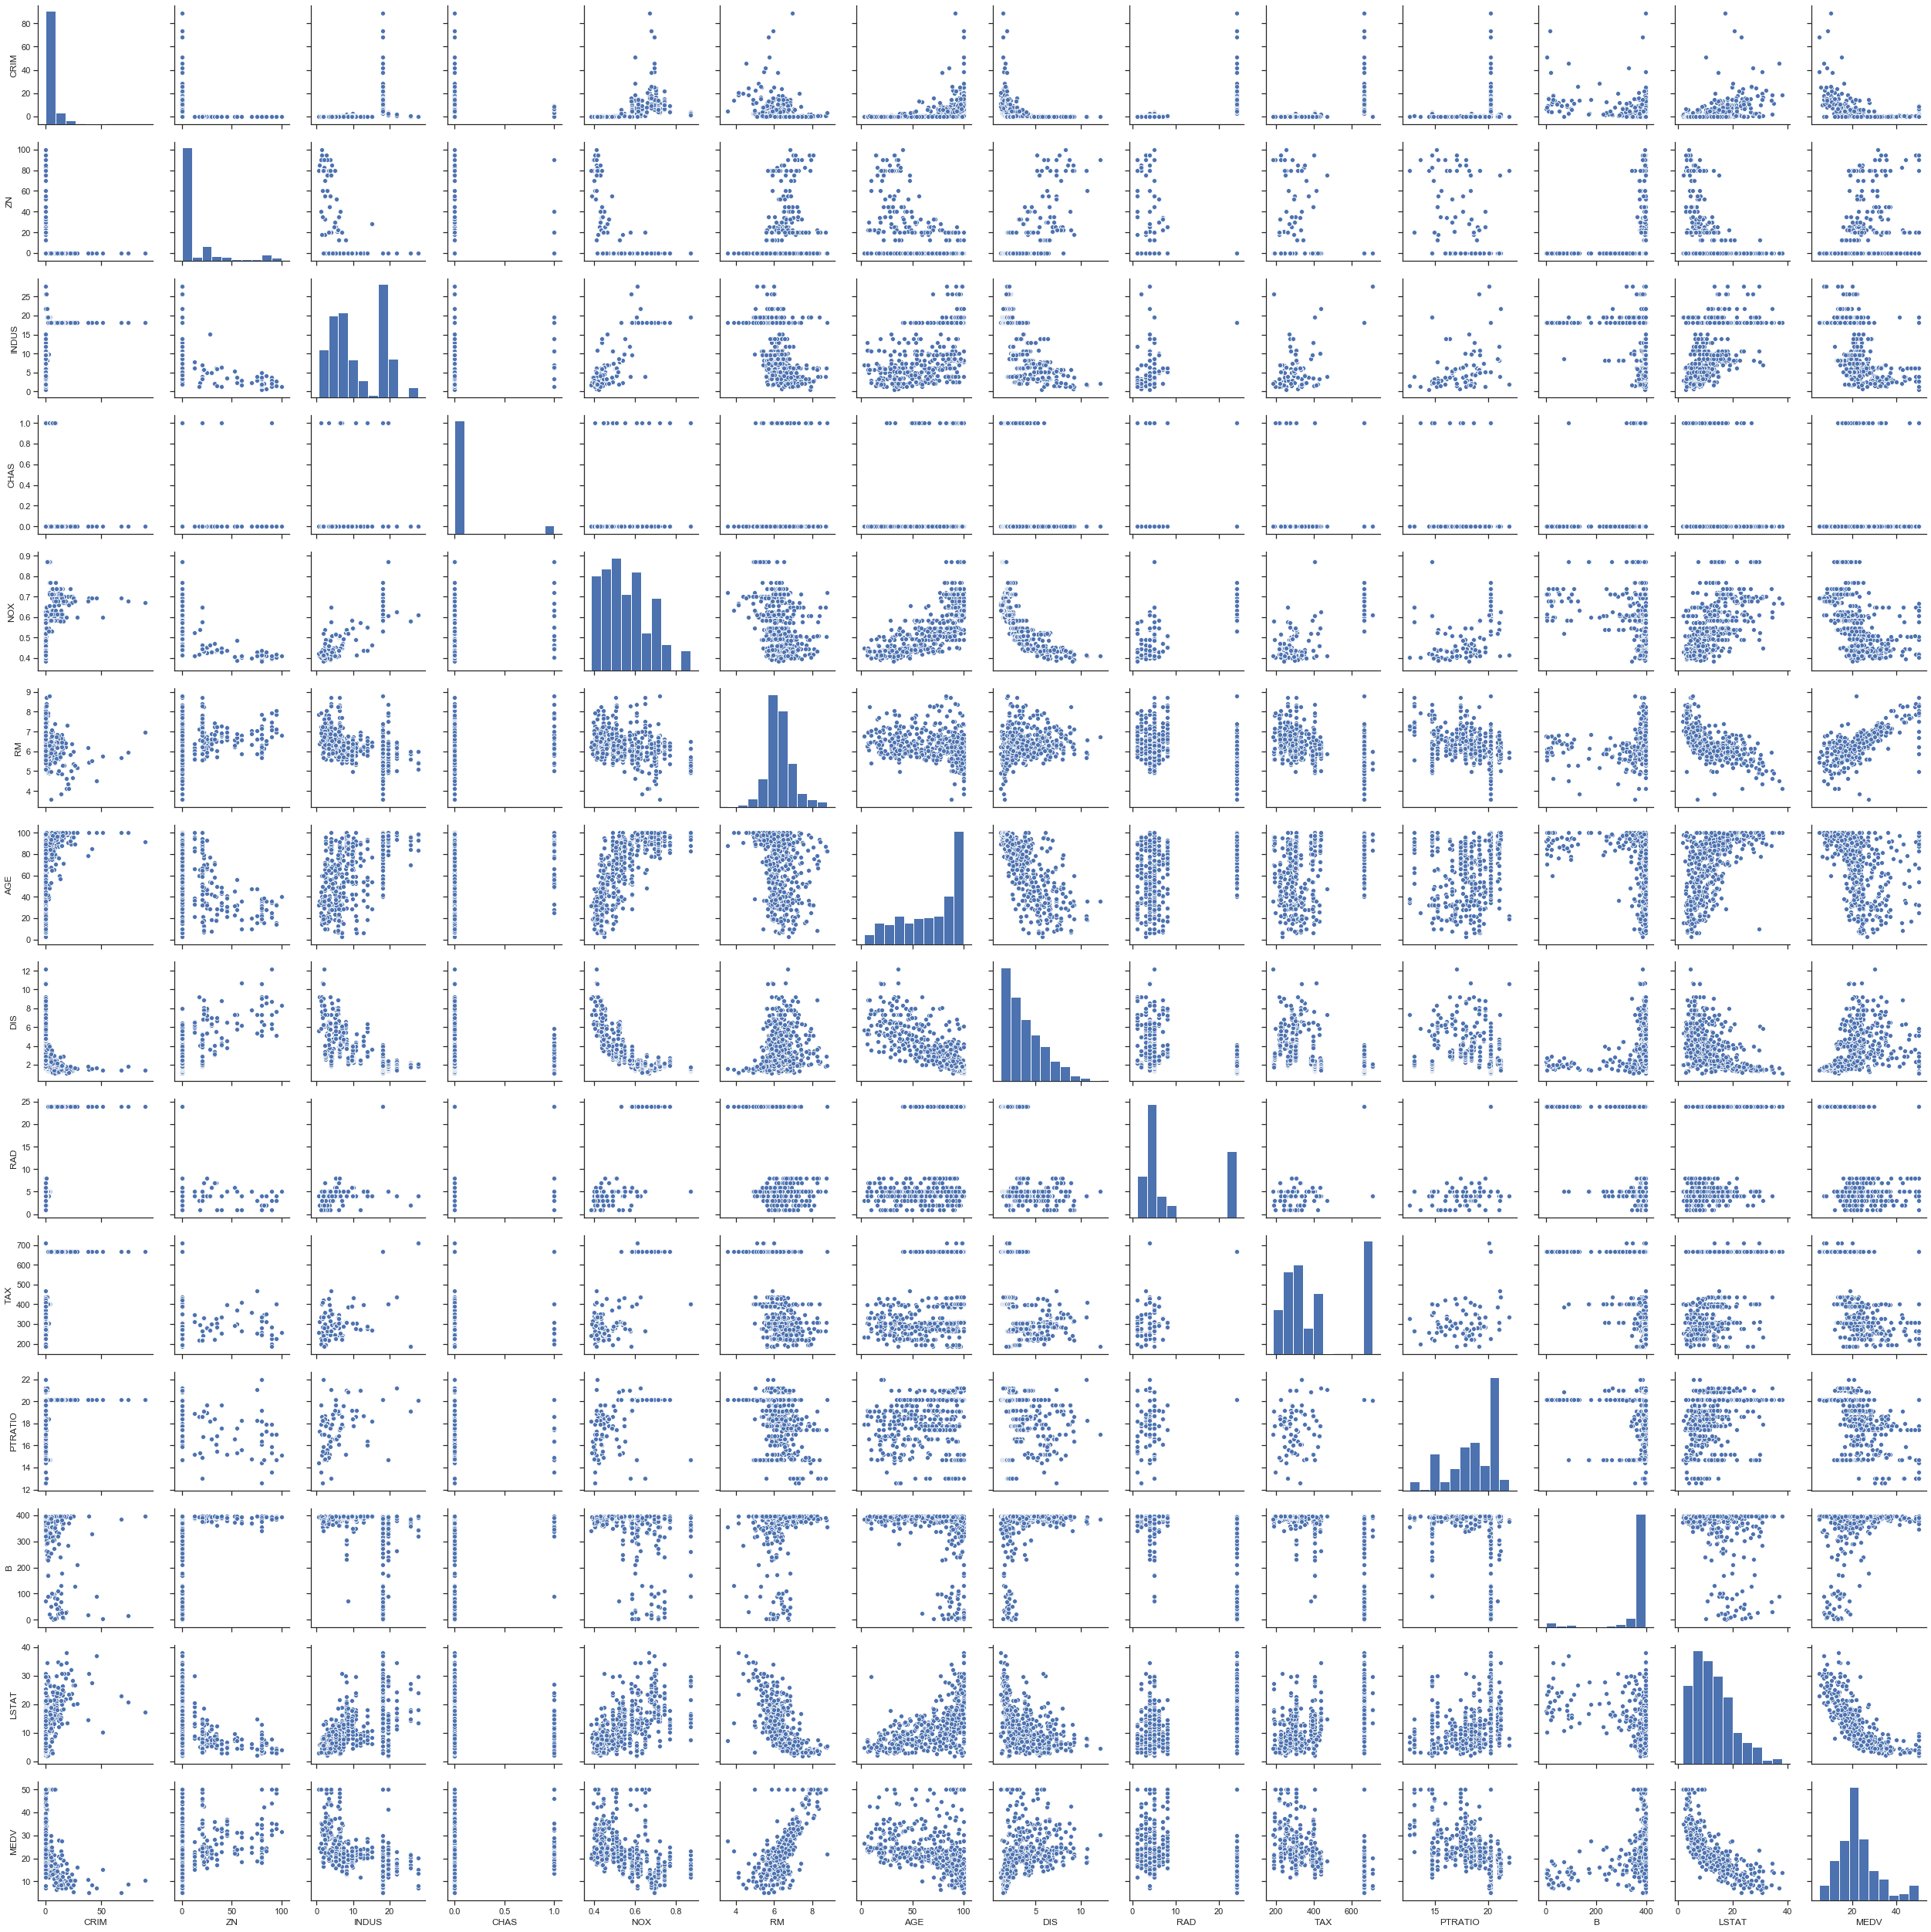

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?

первое значение по горизонтали, второе - по вертикали:
1.   Нормальное (6;6) - единственное похожее на нормальное, хотя больше стьюдента
2.   Равномерное (среди этих нет)
3.   Биноминальное (14,14)
4.   Бернулли      (4,4)
5.   Геометрическое (8,8)
6.   Логнормальное (13,13)



In [5]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [72]:
cov_df=df.drop(['Country (region)'], axis=1).dropna()

In [73]:
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 10 columns):
Ladder                     140 non-null int64
SD of Ladder               140 non-null int64
Positive affect            140 non-null float64
Negative affect            140 non-null float64
Social support             140 non-null float64
Freedom                    140 non-null float64
Corruption                 140 non-null float64
Generosity                 140 non-null float64
Log of GDP
per capita      140 non-null float64
Healthy life
expectancy    140 non-null float64
dtypes: float64(8), int64(2)
memory usage: 12.0 KB


Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [74]:
cov=np.cov(cov_df.T)

In [75]:
cov

array([[2088.55066804, 1171.89280576, 1037.04069887, 1097.68016444,
        1745.00719424, 1126.43720452,  437.43597122,  992.82230216,
        1625.96176773, 1661.55015416],
       [1171.89280576, 2127.17014388,  184.69568345, 1298.79928058,
        1268.0323741 ,  520.63165468,  498.41654676,  796.97446043,
        1327.72014388, 1293.22194245],
       [1037.04069887,  184.69568345, 1965.29311408,  694.32127441,
         880.13669065, 1392.96279548,  427.18848921,  826.97194245,
         597.45693731,  661.01243577],
       [1097.68016444, 1298.79928058,  694.32127441, 1980.79527235,
        1369.01438849,  835.04152107,  316.04028777,  697.80791367,
        1091.69558068,  992.67965057],
       [1745.00719424, 1268.0323741 ,  880.13669065, 1369.01438849,
        2099.08633094,  989.15107914,  290.97841727,  918.33453237,
        1592.89208633, 1521.89568345],
       [1126.43720452,  520.63165468, 1392.96279548,  835.04152107,
         989.15107914, 2034.81932169,  784.23597122, 1005

In [107]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

в country отсутствующих значений нет

In [108]:

data.isna()[data.isna()==True].count()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

Ответ: 156 из которых мы можем 140 проанализировать (у других есть NA в других колонках, если таргет - это страна, то да, можно считать классификацией.)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [110]:
data['Country (region)'].value_counts().sum()

156

In [111]:
data=data.dropna()

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           140 non-null object
Ladder                     140 non-null int64
SD of Ladder               140 non-null int64
Positive affect            140 non-null float64
Negative affect            140 non-null float64
Social support             140 non-null float64
Freedom                    140 non-null float64
Corruption                 140 non-null float64
Generosity                 140 non-null float64
Log of GDP
per capita      140 non-null float64
Healthy life
expectancy    140 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

Ответ:  из графика ниже выражена линрейная зависимость между "Log of GDP" и "Healthy life expectancy"
по этому графику также можно понять, какие страны похожи, например, Finland, Denmark, Norway 

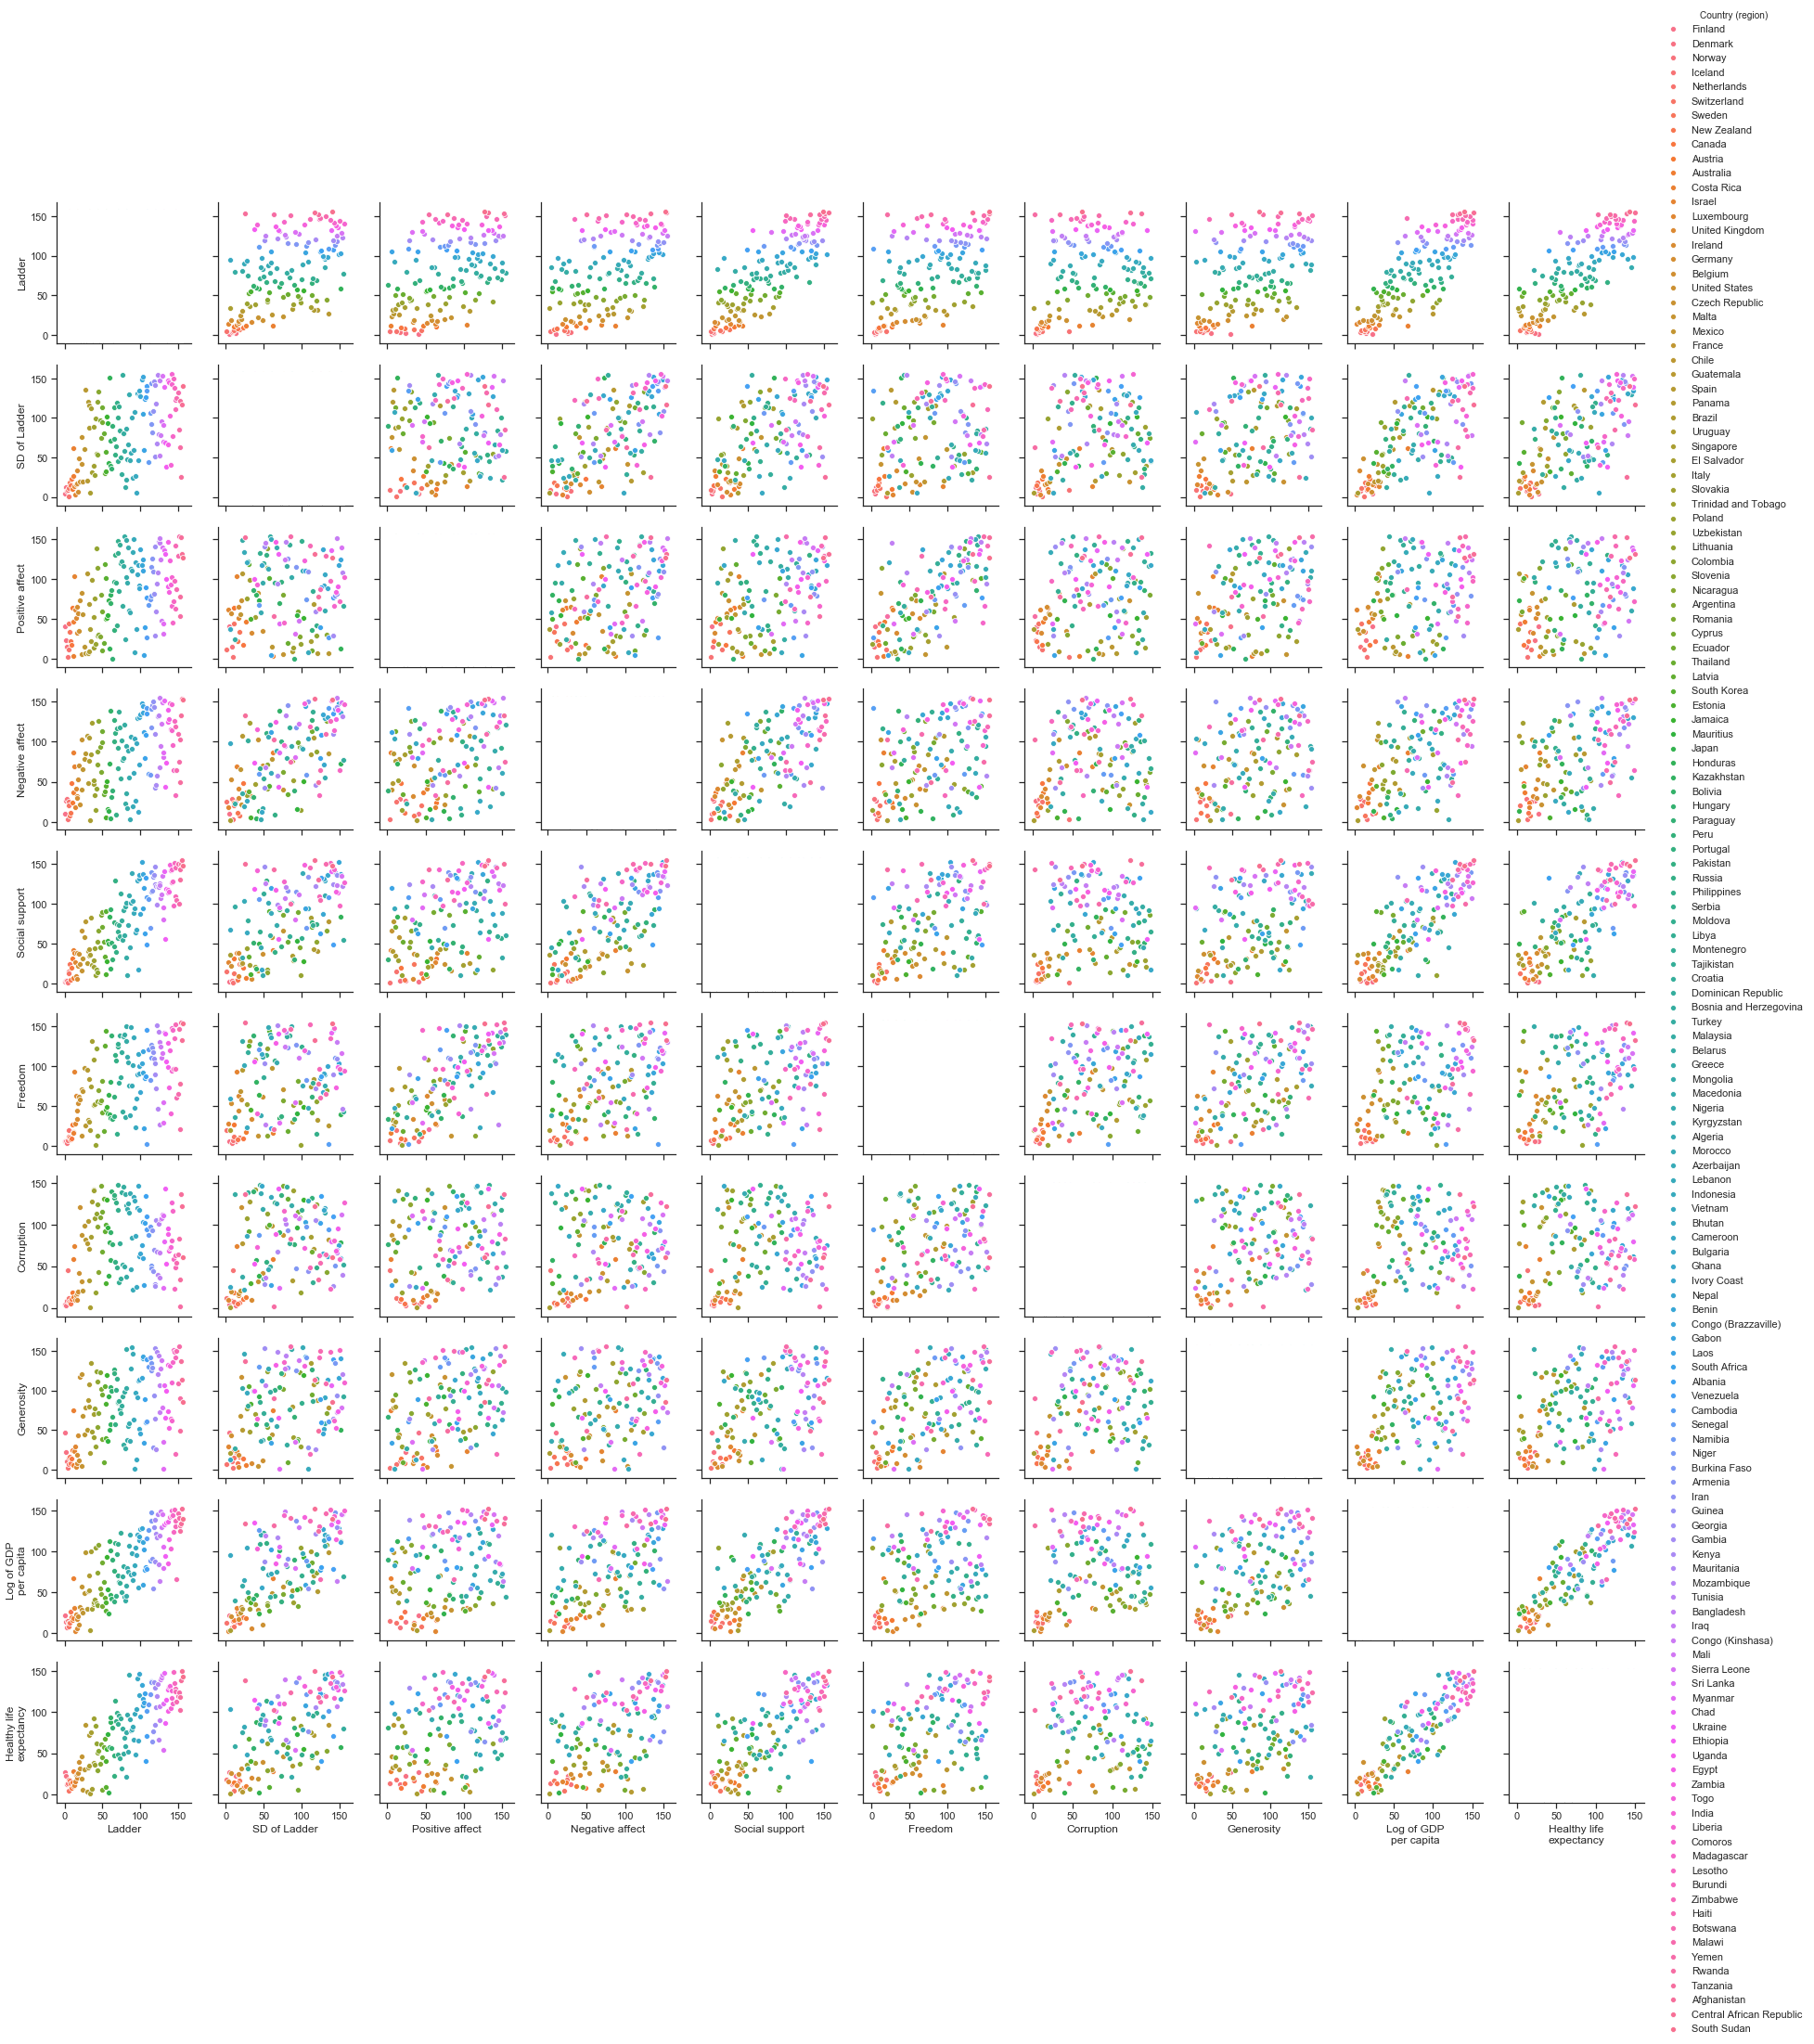

In [105]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data, hue='Country (region)', diag_kind='hist')
plt.show()

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

Ответ: Ladder имеет линейную зависимость от Socian Support, Log of GDR и Healthy life (последние два взаимосвязаны между собой)

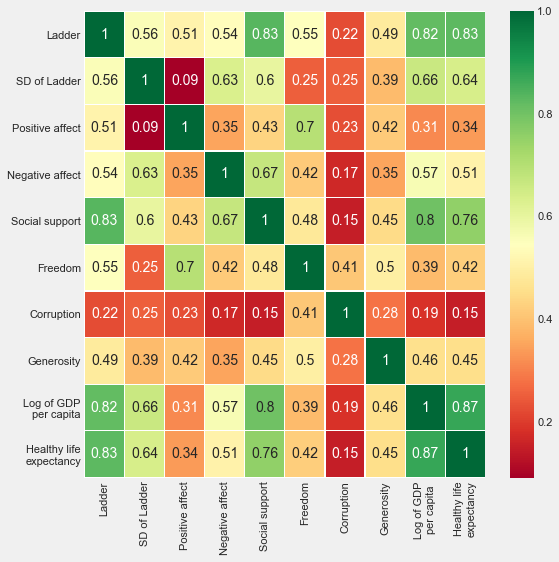

In [168]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

Ответ: из матрицы выше видно, что теснота связи прямая и слабая 0.49.
График по Ladder и Generosity ниже. Данная прямая не является собственным вектором, так как формула другая, поэтому и разброс данных при проецировании на прямую ниже не может считаться максимальным.

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler

In [180]:
A = data[['Ladder','Generosity']]

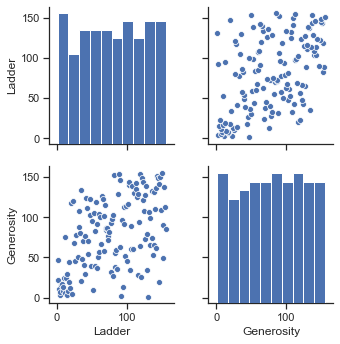

In [181]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(A)
plt.show()

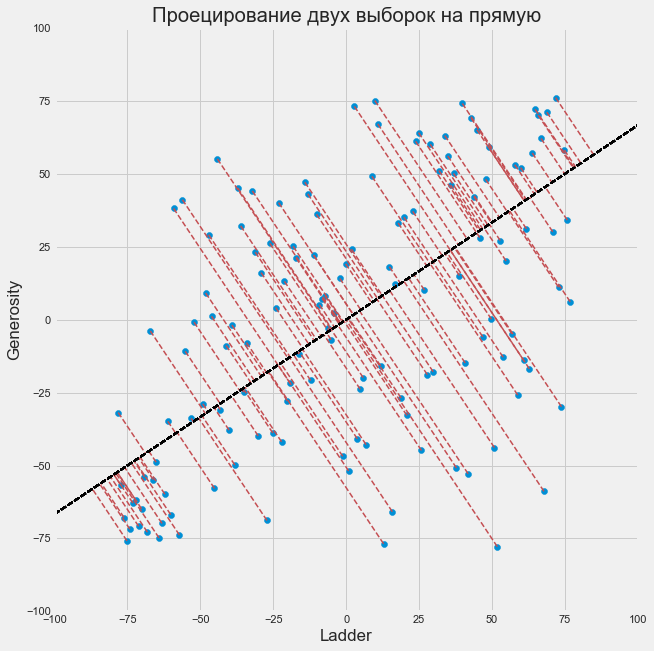

In [170]:
A = StandardScaler(with_std=False,copy=False).fit_transform(A)

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_aspect('equal')
ax0.set_xlim((-100,100))
ax0.set_ylim((-100,100))

ax0.scatter(A[:,0],A[:,1])


for i in range(len(A[:,0])):

    # строим прямую v
    v = np.array([3,2])
    ax0.plot(np.linspace(-100,100),np.linspace(-100,100)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5)   

    # 2 выборки заданы в векторе A. Построим точку w из текущего значения двух выборок
    w = np.array([A[i][0],A[i][1]])

    # строим проекцию данной точки w на вектор v: cv
    cv = 0 + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

    # линия между v и cv
    ax0.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)


    # проверить результат
#    print(np.dot((w-cv),cv))
plt.xlabel('Ladder')
plt.ylabel('Generosity')
plt.title('Проецирование двух выборок на прямую')
plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Ответ: Ниже гистограма расапределения дискретной случайной величины. 

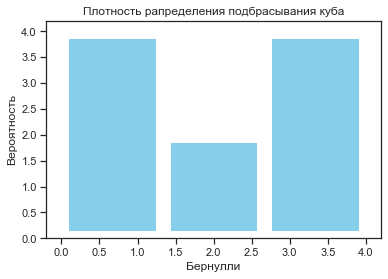

In [129]:
rng = np.random.RandomState(123456)

cube_flips = rng.randint(0, 7, size=10)
ax= sns.distplot(cube_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания куба')
plt.show()

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

Ответ: Так как в прошлом опыте подбрасываний было всего 10,
то этого было недостаточно, чтобы продемонстрировать равномерность дискретной случайной величины. 
Сейчас при увеличении кол-ва экспериментов распределение стремится к теоретической "равномерности"

чтобы применить предельную центральную теорему, условимся в исследорвании вероятности для нахождения распределения выпадания только "1" на костях. У нас есть 1000 подбрасываний, т.е. это 100 экспериментов по 10 подбрасываний

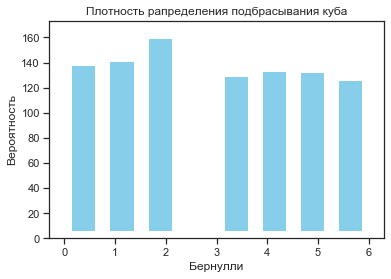

In [132]:
rng = np.random.RandomState(123456)

cube_flips = rng.randint(0, 7, size=1000)
ax= sns.distplot(cube_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания куба')
plt.show()

1 experiment with coin flips:  [4 5 5 3 6 4 2 6 1 5]


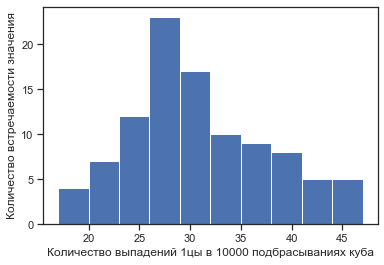

In [138]:
n_experiments = 100
n_bernoulli_1 = 10

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    cube_flips = rng.randint(0, 7, size=n_bernoulli_1)
    # cube_flips - выборка из 100 подбрасываний
    one_counts = np.sum(cube_flips)
    outcomes[i] = one_counts

print('1 experiment with coin flips: ', cube_flips)
plt.hist(outcomes)
plt.xlabel('Количество выпадений 1цы в 100 подбрасываниях куба')
plt.ylabel('Количество встречаемости значения')
plt.show()